# Example 01 – Basics

In this tutorial, we will present the basic usage of the package.

## Model

The `Model` class is the most important class, directly available in `pystrel`.
This class represents the system that one wants to solve.
It allows for creating Hamiltonian operators for the given set of parameters.
We strive to provide a simple API with type hints for the users whenever possible.
The minimal working example that produces a valid Hamiltonian for the system is presented below.

> **Hint**  
> Keep an eye out for IDE hints that offer potential parameter keywords along with appropriate descriptions.
> 
> 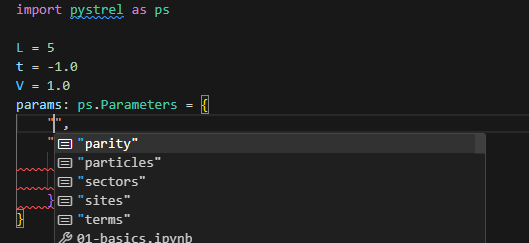
> 
> 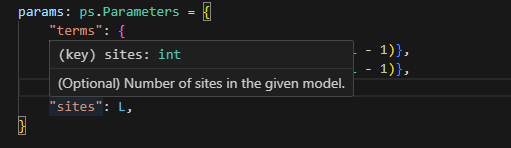

In [1]:
import pystrel as ps

L = 5
t = -1.0
V = 1.0
params: ps.Parameters = {
    "terms": {
        "t": {(i, i + 1): t for i in range(L - 1)},
        "V": {(i, i + 1): V for i in range(L - 1)},
    }
}

model = ps.Model(params)

One can `print` the model instance to preview various information about the system represented by the model:

In [2]:
print(model)

# ################ Info ################
# Particle type: spinless fermions
# Model: Ĥ = ∑ᵢⱼ (tᵢⱼ a†ᵢaⱼ + h.c.) +
#            ∑ᵢⱼ Vᵢⱼ nᵢnⱼ
# Space size: 10 × 10
# Ensemble: canonical
# Sectors: [(5, 2)]
# Terms:
# - t: {(0, 1): -1.0, (1, 2): -1.0, (2, 3): -1.0, (3, 4): -1.0}
# - V: {(0, 1): 1.0, (1, 2): 1.0, (2, 3): 1.0, (3, 4): 1.0}


> **Hint**  
> Use `pystrel.terms.utils.info()` to preview available tags with corresponding formulas.

In [3]:
ps.terms.utils.info()

---------------
spinless fermions
---------------
- V: ∑ᵢⱼ Vᵢⱼ nᵢnⱼ
- t: ∑ᵢⱼ (tᵢⱼ a†ᵢaⱼ + h.c.)
- Delta: ∑ᵢⱼ (Δᵢⱼ a†ᵢa†ⱼ + h.c.)
- epsilon: ∑ᵢ εᵢ nᵢ
- mu: μ ∑ᵢ nᵢ

---------------
spins 1/2
---------------
- hx: ∑ᵢ hˣᵢ σˣᵢ
- hz: ∑ᵢ hᶻᵢ σᶻᵢ
- gamma: ∑ᵢⱼ (γᵢⱼ σ⁺ᵢσ⁻ⱼ + h.c.)
- Jz: ∑ᵢⱼ Jᶻᵢⱼ σᶻᵢσᶻⱼ

---------------
spinfull fermions
---------------
not implemented yet

---------------
tj quasiparticles
---------------
not implemented yet




To build the Hamiltonian for the given model, one just has to use the `build_hamiltonian` method:

In [4]:
model.build_hamiltonian()

array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0., -1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0., -1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

The `Model` can also be used to create different operators than Hamiltonian by using the `build_operator` method.
To see available operators and their corresponding `kwargs`, refer to the documentation [**page**](https://andywiecko.github.io/pystrel/pystrel/operators.html).

> **Hint**  
> The list of available operators can also be checked in the IDE.
> 
> 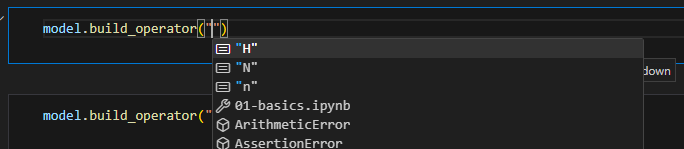

In [5]:
model.build_operator("N")

array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]])

Both methods, `build_hamiltonian` and `build_operator`, can be used to construct matrices on CPU or GPU (if `cupy` is installed) in sparse (in CSR format) or dense format with selected floating-point numbers (real/complex numbers):

In [6]:
import numpy as np

h_dense = model.build_hamiltonian(device="cpu", sparsity="dense")
h_sparse = model.build_hamiltonian(device="cpu", sparsity="sparse")
h_complex = model.build_hamiltonian(device="cpu", dtype=np.complex128)
h_gpu = model.build_hamiltonian(device="gpu")

h_dense, h_sparse, h_complex, h_gpu

(array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  0.,  0., -1.,  0., -1.,  0.,  0.,  0.],
        [ 0.,  0., -1., -1.,  0., -1.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0., -1.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]]),
 <10x10 sparse array of type '<class 'numpy.float64'>'
 	with 28 stored elements in Compressed Sparse Row format>,
 array([[ 1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
          0.+0.j,  0.+0.j,  0.+0.j],
        [-1.+0.j,  0.+0.j, -1.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
          0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j,  1.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0

## Spectrum

Often, the problem is to solve the eigenproblem for the Hamiltonian, i.e., the following equation:

$$
    H |\psi_n\rangle = E_n |\psi_n\rangle
$$

In `pystrel`, there is a module `spectrum` with utilities to solve this problem. 
To obtain the full spectrum (sorted by energies $E_n$), one can use `pystrel.spectrum.get_full_spectrum`.
These utilities support CPU and GPU matrix instances.

In [7]:
h = model.build_hamiltonian(sparsity="dense")
e, v = ps.spectrum.get_full_spectrum(h)

print("eigenvalues:", e)
print("eigenvectors:", v)

eigenvalues: [-2.58837444 -1.4811943  -0.71791156 -0.3939571   0.31110782  1.
  1.25890264  1.45186266  2.17008649  2.9894778 ]
eigenvectors: [[-7.83426278e-02 -2.81122683e-01 -2.18158342e-01 -4.31149797e-01
  -5.01711135e-01 -2.18158342e-01 -3.33143297e-01 -4.31149797e-01
  -2.81122683e-01 -7.83426278e-02]
 [ 2.13566144e-01  5.29899099e-01  2.13566144e-01  3.57751240e-01
  -9.71445147e-17 -2.13566144e-01 -6.38378239e-16 -3.57751240e-01
  -5.29899099e-01 -2.13566144e-01]
 [ 2.00311422e-01  3.44117307e-01  2.76098411e-01 -2.29364039e-01
   1.30195346e-01  2.76098411e-01 -6.38975749e-01 -2.29364039e-01
   3.44117307e-01  2.00311422e-01]
 [ 2.77745270e-01  3.87164991e-01 -1.78293176e-01  5.30743009e-02
  -6.35698028e-01 -1.78293176e-01  2.69442035e-01  5.30743009e-02
   3.87164991e-01  2.77745270e-01]
 [ 2.60328684e-01  1.79338395e-01  2.60328684e-01 -5.76450945e-01
   0.00000000e+00 -2.60328684e-01 -2.77555756e-16  5.76450945e-01
  -1.79338395e-01 -2.60328684e-01]
 [-5.00000000e-01 -5.06

> **Hint**  
> If one does not need to compute eigenvectors, `get_full_spectrum` can return eigenvalues only, which should be more efficient.

In [8]:
ps.spectrum.get_full_spectrum(h, compute_eigenvectors=False)

array([-2.58837444, -1.4811943 , -0.71791156, -0.3939571 ,  0.31110782,
        1.        ,  1.25890264,  1.45186266,  2.17008649,  2.9894778 ])

Sometimes, only selected eigenvalues are sufficient, and in the case of *very large* matrices, finding only a few eigenvalues can be done more efficiently.
`pystrel` provides a utility for this in `pystrel.spectrum.get_partial_spectrum`.
The method has two required parameters:

- `operator` (dense or sparse matrix)
- `k` (number of eigenvalues to compute)

There are more options for this method; check the documentation for [**more details**](https://andywiecko.github.io/pystrel/pystrel/spectrum.html#get_partial_spectrum).

In [9]:
h = model.build_hamiltonian(sparsity="sparse")
e, v = ps.spectrum.get_partial_spectrum(h, k=4)

print("eigenvalues:", e)
print("eigenvectors:", v)

eigenvalues: [-2.58837444 -1.4811943  -0.71791156 -0.3939571 ]
eigenvectors: [[ 7.83426278e-02  2.81122683e-01  2.18158342e-01  4.31149797e-01
   5.01711135e-01  2.18158342e-01  3.33143297e-01  4.31149797e-01
   2.81122683e-01  7.83426278e-02]
 [-2.13566144e-01 -5.29899099e-01 -2.13566144e-01 -3.57751240e-01
   1.11022302e-16  2.13566144e-01 -2.39391840e-16  3.57751240e-01
   5.29899099e-01  2.13566144e-01]
 [-2.00311422e-01 -3.44117307e-01 -2.76098411e-01  2.29364039e-01
  -1.30195346e-01 -2.76098411e-01  6.38975749e-01  2.29364039e-01
  -3.44117307e-01 -2.00311422e-01]
 [-2.77745270e-01 -3.87164991e-01  1.78293176e-01 -5.30743009e-02
   6.35698028e-01  1.78293176e-01 -2.69442035e-01 -5.30743009e-02
  -3.87164991e-01 -2.77745270e-01]]


## Measurements

During system studies, it is important to measure certain quantities.
The `pystrel` package provides utilities to calculate the average values of operators, given by:

$$
    \langle A \rangle = \langle \psi | A | \psi \rangle.
$$

To calculate $\langle A\rangle$ use the `pystrel.laboratory.measure` method.

In [10]:
h = model.build_hamiltonian()
N = model.build_operator("N")
_, v = ps.spectrum.get_full_spectrum(h)
psi = v[0]
phi = v[1]

ps.laboratory.measure(N, psi)

1.9999999999999978

Sometimes, is is interesting to calculate state projections $p$:

$$
    p = \|\langle \phi | \psi \rangle\|^2
$$

To calculate this in `pystrel`, use `pystrel.laboratory.project` method.

In [11]:
ps.laboratory.project(psi, psi), ps.laboratory.project(phi, psi)

(0.9999999999999978, 2.9293394454129857e-31)